## 1. Introduction

Objectives:
* where are the 5 departments in the progress of the deployment ?
* how has the deployment evolved since the start ?


---
## 2. Importing libraries and data

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
df = pd.read_csv("ftth-en-pays-de-la-loire.csv")

---
## 3. Learn more about data

Each row represents a municipality, each column contains munipality's attributes

In [131]:
df.head(3)

,Code INSEE,code_region,code_departement,Département,siren_epci,EPCI,Logements,Établissements,Locaux raccordables 4eme trimestre 2017,Locaux raccordables 1er trimestre 2018,...,EPCI AMII,Nombre locaux IPE T2 2022 (somme tous OI),Source retenue T2 2022,Meilleure estimation des locaux T2 2022,Zones très denses,Engagements L. 33-13 et AMEL,Intentions privées hors engagement L. 33-13,Commune rurale,OI T2 2022,Locaux raccordables 2eme trimestre 2022
0,44013,52,44,Loire-Atlantique,244400644,CA de la Région Nazairienne et de l'Estuaire (...,"1,302",45,0,0,...,Oui,"1,524",IPE T2 2022 (un IPE),"1,524",0,NaN,0,1,FRTE,"1,404"
1,44020,52,44,Loire-Atlantique,244400404,Nantes Métropole,"8,499",484,"2,658","2,743",...,Oui,"10,434",IPE T2 2022 (un IPE),"10,434",0,NaN,0,0,SFTT,"10,039"
2,44021,52,44,Loire-Atlantique,200071546,CA Pornic Agglo Pays de Retz,"2,381",109,0,0,...,Non,0,INSEE 2018 (IPE moins complet),"2,491",0,0.0,0,1,NaN,0


The data set includes information about:
* the department of the municipality
* the number of addresses to deploy
* the number of addresses deployed

In [132]:
df.shape

(1235, 40)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 40 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Code INSEE                                   1235 non-null   int64  
 1   code_region                                  1235 non-null   int64  
 2   code_departement                             1235 non-null   int64  
 3   Département                                  1235 non-null   object 
 4   siren_epci                                   1235 non-null   object 
 5   EPCI                                         1234 non-null   object 
 6   Logements                                    1235 non-null   object 
 7   Établissements                               1235 non-null   object 
 8   Locaux raccordables 4eme trimestre 2017      1235 non-null   object 
 9   Locaux raccordables 1er trimestre 2018       1235 non-null   object 
 10  

---
## 4. Formatting and cleaning data set

##### Rename columns:

In [134]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('É', 'E')
df.columns = df.columns.str.replace('é', 'e')
# df.columns = df.columns.str.replace('Locaux_raccordables_1er_trimestre_', 'raccordables_trim_1_')
# df.columns = df.columns.str.replace('Locaux_raccordables_2eme_trimestre_', 'raccordables_trim_2_')
# df.columns = df.columns.str.replace('Locaux_raccordables_3eme_trimestre_', 'raccordables_trim_3_')
# df.columns = df.columns.str.replace('Locaux_raccordables_4eme_trimestre_', 'raccordables_trim_4_')
df.columns = df.columns.str.replace('Locaux_raccordables_1er_trimestre_', 't1_')
df.columns = df.columns.str.replace('Locaux_raccordables_2eme_trimestre_', 't2_')
df.columns = df.columns.str.replace('Locaux_raccordables_3eme_trimestre_', 't3_')
df.columns = df.columns.str.replace('Locaux_raccordables_4eme_trimestre_', 't4_')

##### Remove commas and change column types for numeric columns:

In [135]:
df = df.replace(',', '', regex=True)

# cols = df.loc[:, df.columns.str.startswith("raccordables_trim_")].columns
cols = df.loc[:, df.columns.str.startswith("t")].columns
df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
df['Logements'] = df['Logements'].apply(pd.to_numeric, errors='ignore')
df['Etablissements'] = df['Etablissements'].apply(pd.to_numeric, errors='ignore')
df['Nombre_locaux_IPE_T2_2022_(somme_tous_OI)'] = df['Nombre_locaux_IPE_T2_2022_(somme_tous_OI)'].apply(pd.to_numeric, errors='ignore')
df['Meilleure_estimation_des_locaux_T2_2022_'] = df['Meilleure_estimation_des_locaux_T2_2022_'].apply(pd.to_numeric, errors='ignore')

df.head(3)


,Code_INSEE,code_region,code_departement,Departement,siren_epci,EPCI,Logements,Etablissements,t4_2017,t1_2018,...,EPCI_AMII,Nombre_locaux_IPE_T2_2022_(somme_tous_OI),Source_retenue_T2_2022_,Meilleure_estimation_des_locaux_T2_2022_,Zones_très_denses,Engagements_L._33-13_et_AMEL,Intentions_privees_hors_engagement_L._33-13,Commune_rurale,OI_T2_2022,t2_2022
0,44013,52,44,Loire-Atlantique,244400644,CA de la Région Nazairienne et de l'Estuaire (...,1302,45,0,0,...,Oui,1524,IPE T2 2022 (un IPE),1524,0,NaN,0,1,FRTE,1404
1,44020,52,44,Loire-Atlantique,244400404,Nantes Métropole,8499,484,2658,2743,...,Oui,10434,IPE T2 2022 (un IPE),10434,0,NaN,0,0,SFTT,10039
2,44021,52,44,Loire-Atlantique,200071546,CA Pornic Agglo Pays de Retz,2381,109,0,0,...,Non,0,INSEE 2018 (IPE moins complet),2491,0,0.0,0,1,NaN,0


---
## 5. Data visualization

##### First we try to visualize the deployment for each department in 2022:

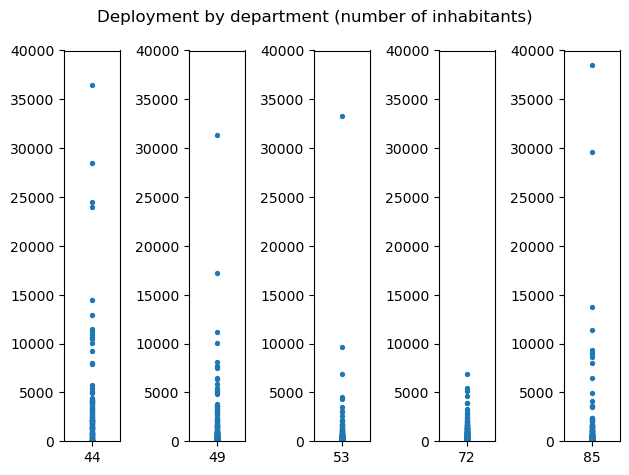

In [136]:
fig, axis = plt.subplots(1, 5)
for i, dep in zip(range(0, 5), [44, 49, 53, 72, 85]):
    axis[i].scatter(df[df['code_departement']==dep]['code_departement'], df[df['code_departement']==dep]['t2_2022'], s=8)
    x = df[df['code_departement']==dep]['code_departement'].unique()
    axis[i].set_xticks(x,x)
    axis[i].set_ylim(0, 40000)
fig.suptitle("Deployment by department (number of inhabitants)")
fig.tight_layout()
plt.show()

__Observations:__
* it does not really make sense to compare the raw data because the different departments do not have the same number of inhabitants
* it would be more relevant to calculate the rate of progress (raccordables / logements)

In [137]:
df['t2_2022_rate'] = df.t2_2022 / df.Meilleure_estimation_des_locaux_T2_2022_ * 100

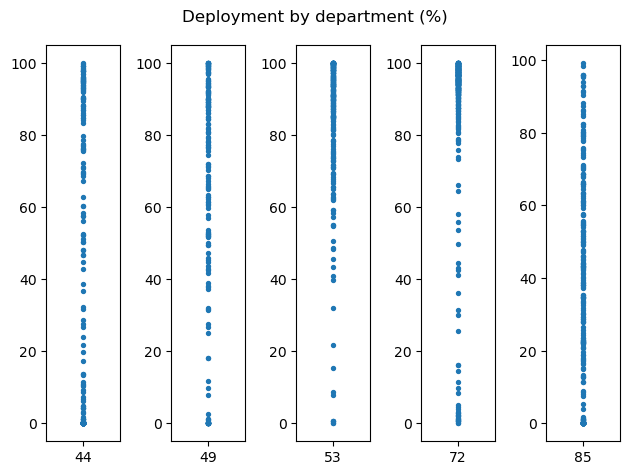

In [138]:
fig, axis = plt.subplots(1, 5)
for i, dep in zip(range(0, 5), [44, 49, 53, 72, 85]):
    axis[i].scatter(df[df['code_departement']==dep]['code_departement'], df[df['code_departement']==dep]['t2_2022_rate'], s=8)
    x = df[df['code_departement']==dep]['code_departement'].unique()
    axis[i].set_xticks(x,x)
fig.suptitle("Deployment by department (%)")
fig.tight_layout()
plt.show()

__First observations:__
* 49 and 53 seem to be more advanced than the other departments
* 85 has very well distributed data with municipalities at each stage of deployment
* 44 and 72 seem to have the majority of municipalities are very well deployed or very few

---
##### Calculate the mean and the median to confirm/infirm the first observations:

In [139]:
period = 't2_2022_rate'

for dep in [44, 49, 53, 72, 85]:  
    mean = df[df['code_departement'] == dep][period].mean()
    print(f"Mean {dep} = {mean}")

Mean 44 = 39.56393936717547
Mean 49 = 64.388474749317
Mean 53 = 83.90623086266652
Mean 72 = 86.16038417389296
Mean 85 = 36.53044481075807


---

In [140]:
for dep in [44, 49, 53, 72, 85]:  
    percentiles = round(df[df['code_departement'] == dep][period].quantile([0.25, 0.5, 0.75]), 2)
    print(f"Percentile {dep} = 0.25 -> {percentiles[0.25]}\t0.50 -> {percentiles[0.50]}\t0.75 -> {percentiles[0.75]}")

Percentile 44 = 0.25 -> 0.0	0.50 -> 21.81	0.75 -> 85.87
Percentile 49 = 0.25 -> 45.27	0.50 -> 76.76	0.75 -> 91.32
Percentile 53 = 0.25 -> 78.34	0.50 -> 91.02	0.75 -> 97.29
Percentile 72 = 0.25 -> 91.15	0.50 -> 95.32	0.75 -> 97.9
Percentile 85 = 0.25 -> 1.59	0.50 -> 34.86	0.75 -> 60.75


---

Observations:
* 53 and 72 have more than half of their municipalities deployed at 90%
* at least 75% of municipalities in 72 have reached 91% deployment
* 44 and 85: for 25% of municipalities, the deployment didn't start


##### It will be interesting to observe the same indicators not by municipality but by number of inhabitants:

In [141]:
for dep in [44, 49, 53, 72, 85]:
    deployment = df[df['code_departement'] == dep]['t2_2022'].sum()
    addresses = df[df['code_departement'] == dep]['Meilleure_estimation_des_locaux_T2_2022_'].sum()
    print(f"{dep} deployment rate by address = {int(deployment / addresses * 100)} %")

44 deployment rate by address = 70 %
49 deployment rate by address = 75 %
53 deployment rate by address = 87 %
72 deployment rate by address = 86 %
85 deployment rate by address = 54 %


Observations:
* It seems that the analysis by address and not by municipality narrows the gap
* An explanation could be that in 44 and 85, the most populated cities were deployed first before the rural areas.

---
## Plot the evolutions since 2017

* to do this, we need to:
 * make an aggregation of data by department (groupby)
 * delete unnecessary columns
 * unpivot the table to get just one column with dates and another with the number of deployed addresses

In [142]:
df_by_dep = df.copy()
df_by_dep = df_by_dep.groupby('code_departement', as_index=False).sum()
df_by_dep =df_by_dep.drop(columns=[
    'Code_INSEE',
    'code_region',
    'Logements',
    'Etablissements',
    'deploiement',
    'Nombre_locaux_IPE_T2_2022_(somme_tous_OI)',
    'Meilleure_estimation_des_locaux_T2_2022_',
    'Zones_très_denses',
    'Engagements_L._33-13_et_AMEL',
    'Intentions_privees_hors_engagement_L._33-13',
    'Commune_rurale',
    't2_2022_rate'
])

df_by_dep = df_by_dep.melt(id_vars='code_departement', var_name='date', value_name='raccordables')

# add a column with the nb of addresses by department
conditions = [
    df_by_dep['code_departement'] == 44,
    df_by_dep['code_departement'] == 49,
    df_by_dep['code_departement'] == 53,
    df_by_dep['code_departement'] == 72,
    df_by_dep['code_departement'] == 85,]

values = [
    df[df['code_departement'] == 44]['Meilleure_estimation_des_locaux_T2_2022_'].sum(),
    df[df['code_departement'] == 49]['Meilleure_estimation_des_locaux_T2_2022_'].sum(),
    df[df['code_departement'] == 53]['Meilleure_estimation_des_locaux_T2_2022_'].sum(),
    df[df['code_departement'] == 72]['Meilleure_estimation_des_locaux_T2_2022_'].sum(),
    df[df['code_departement'] == 85]['Meilleure_estimation_des_locaux_T2_2022_'].sum()]

df_by_dep['addresses'] = np.select(conditions, values)

# add a column with the rate raccordables / nb_addresses
df_by_dep['rate'] = df_by_dep.raccordables / df_by_dep['addresses'] * 100


/tmp/ipykernel_31378/3463714599.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_by_dep = df_by_dep.groupby('code_departement', as_index=False).sum()


---
##### deployment curve in value (nb of addresses):

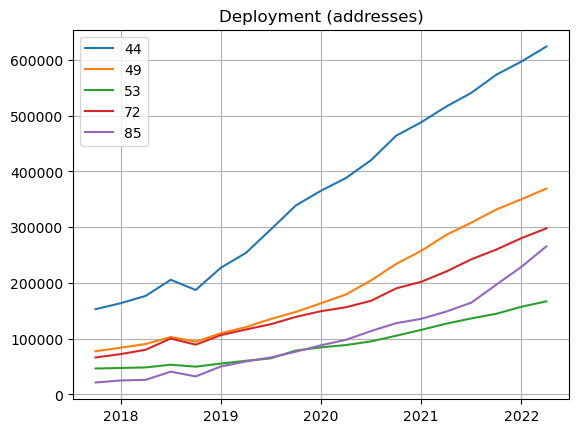

In [143]:
for dep in [44, 49, 53, 72, 85]:
    dep_filter = df_by_dep['code_departement'] == dep
    plt.plot(df_by_dep[dep_filter]['date'], df_by_dep[dep_filter]['raccordables'], label=dep)
    plt.xticks(['t1_2018','t1_2019','t1_2020','t1_2021', 't1_2022'],
               ['2018','2019','2020','2021','2022'])

plt.legend()
plt.grid()
plt.title("Deployment (addresses)")
plt.show()

---
##### deployment curve in %:

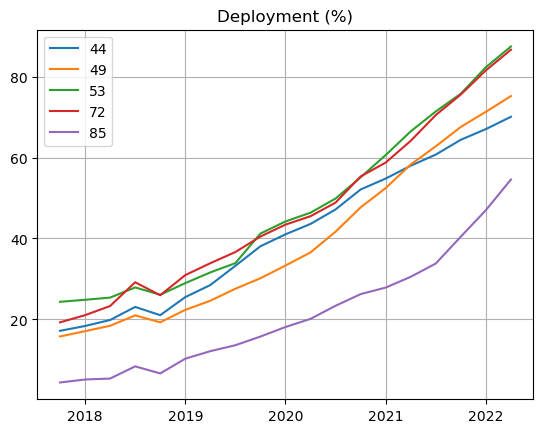

In [144]:
for dep in [44, 49, 53, 72, 85]:
    dep_filter = df_by_dep['code_departement'] == dep
    plt.plot(df_by_dep[dep_filter]['date'], df_by_dep[dep_filter]['rate'], label=dep)
    plt.xticks(['t1_2018','t1_2019','t1_2020','t1_2021', 't1_2022'],
               ['2018','2019','2020','2021','2022'])

plt.legend()
plt.grid()
plt.title("Deployment (%)")
plt.show()